In [1]:
import pandas as pd
import numpy as np
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import matplotlib.pyplot as plt
import os, sys, subprocess
%load_ext watermark

New pandarallel memory created - Size: 2000 MB
Pandarallel will run on 8 workers


In [2]:
%watermark

2019-11-06T09:32:58+01:00

CPython 3.6.9
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-32-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [5]:
#parameters
workingdir=r"/home/fvalle/phd/master_thesis/docker"
execdir = r"/home/fvalle/phd/master_thesis/docker"
#dockerurl = "cloudadm@193.144.35.220:/home/cloudadm/drive"
#dockerurl = "filippo.valle@c3s.unito.it:"

In [6]:
os.chdir(workingdir)

# Get the data
[Table_creation](Table_creation.ipynb) does this for you

# Get annotations

In [7]:
df_file=pd.read_csv("files.dat", index_col=[0])
df_file.head()

,RPPA,primary_site,disease_type,primary_diagnosis
file_name,,,,
6360d281-1d89-43a0-aaea-46a46533ae38.htseq.counts.gz,LumA,Breast,Breast Invasive Carcinoma,"Infiltrating duct carcinoma, NOS"
1f90a18e-1e38-4365-bbbe-9959fe96ef77.htseq.counts.gz,ReacII,Breast,Breast Invasive Carcinoma,"Infiltrating duct carcinoma, NOS"
58d232f8-75a8-4981-9ccd-0530a31b4610.htseq.counts.gz,Basal,Breast,Breast Invasive Carcinoma,Infiltrating duct mixed with other types of ca...
b8e564b0-affd-4137-a10c-be4fe254a905.htseq.counts.gz,LumA/B,Breast,Breast Invasive Carcinoma,"Infiltrating duct carcinoma, NOS"
ca5d0721-99cf-4b7c-b708-6acea2ae86bd.htseq.counts.gz,LumA/B,Breast,Breast Invasive Carcinoma,"Infiltrating duct carcinoma, NOS"


In [8]:
df_file.groupby(by='primary_site').count()

,RPPA,disease_type,primary_diagnosis
primary_site,,,
Breast,36,36,36


In [9]:
pc=pd.read_csv("%s/genes.txt"%execdir, index_col=[0])
pc=pc[pc['type_of_gene']=='protein-coding']
pc.head()

,lenght,type_of_gene,exons
ENSG00000167578,18722.0,protein-coding,18696.0
ENSG00000078237,46830.0,protein-coding,38812.0
ENSG00000146083,11328.0,protein-coding,10691.0
ENSG00000158486,226330.0,protein-coding,217697.0
ENSG00000198242,4966.0,protein-coding,4375.0


# Run statistics
```python
import tacos
tacos.statistics()
tacos.shuffleLabels()
```

CHECK **BioParameters.h** before compiling

In [10]:
df=pd.read_csv("mainTable.csv", index_col=0,header=0)

In [11]:
df.apply(lambda x: len(np.nonzero(x)[0])/len(x), axis=1).to_csv("O.dat", header=False, index=False)
df.apply(lambda x: np.sum(x), axis=1).to_csv("A.dat", header=False, index=False)
df.apply(lambda x: np.sum(x), axis=0).to_csv("vocabulary_size.dat", header=False, index=False)
pd.DataFrame(data=[df.apply(lambda x: np.sum(x), axis=0).values,df.apply(lambda x: len(np.nonzero(x)[0]), axis=0).values]).transpose().to_csv("heaps.dat",header=False,index=False)
pd.DataFrame(data=[df.apply(lambda x: np.average(x), axis=1).values,df.apply(lambda x: np.var(x), axis=1).values,df.apply(lambda x: np.nan, axis=1).values], columns=df.index, index=['mean','variance','type_of_gene']).transpose().to_csv("meanVariances.csv",header=True,index=True)

/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [12]:
os.chdir(workingdir)
mv = pd.read_csv("meanVariances.csv", index_col=0)
o=pd.read_csv("O.dat", header=None)
mv.insert(3,'occurrence',o.values)
mv.to_csv("meanVariances.csv")

# Analyse table and select genes

[Table_Analyser.ipynb](Table_Analyzer.ipynb)

In [13]:
os.chdir(execdir)
from tableanalyser import scalinglawsandoverexpressed

<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, ENSG00000167578 to ENSG00000181518
Data columns (total 36 columns):
6360d281-1d89-43a0-aaea-46a46533ae38.htseq.counts.gz    19369 non-null int64
1f90a18e-1e38-4365-bbbe-9959fe96ef77.htseq.counts.gz    19369 non-null int64
58d232f8-75a8-4981-9ccd-0530a31b4610.htseq.counts.gz    19369 non-null int64
b8e564b0-affd-4137-a10c-be4fe254a905.htseq.counts.gz    19369 non-null int64
ca5d0721-99cf-4b7c-b708-6acea2ae86bd.htseq.counts.gz    19369 non-null int64
f8a64fd0-7e9c-4796-988d-607ed07c4c23.htseq.counts.gz    19369 non-null int64
e8201ee9-2e0a-4a8e-bc99-6e2482da919d.htseq.counts.gz    19369 non-null int64
b033c85a-2395-4ced-a84d-ac1fbce674bf.htseq.counts.gz    19369 non-null int64
2eeb46a1-0422-4a77-b58d-3b7d57d51b44.htseq.counts.gz    19369 non-null int64
96ddce60-2be5-4f57-814b-35722aa00fd9.htseq.counts.gz    19369 non-null int64
9151bbcc-ecef-40fc-8834-e24ff848e1a2.htseq.counts.gz    19369 non-null int64
6a508e94-c094-4c0f-85c3-5

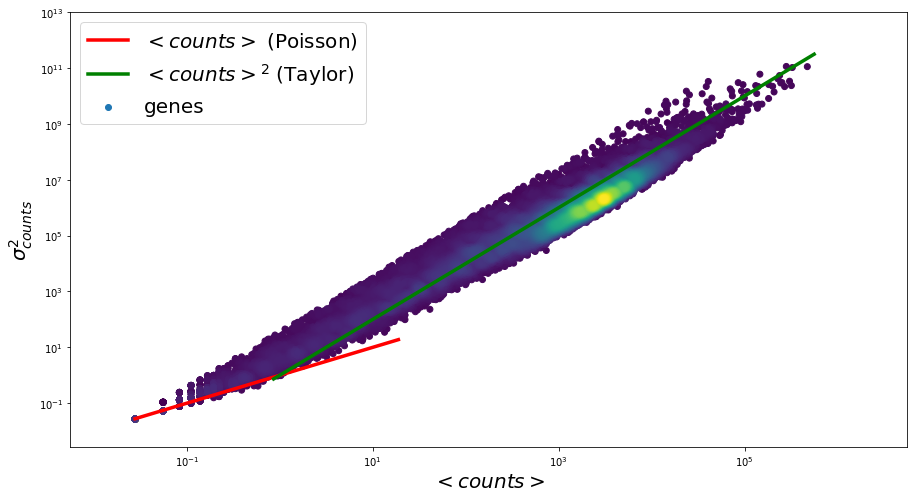

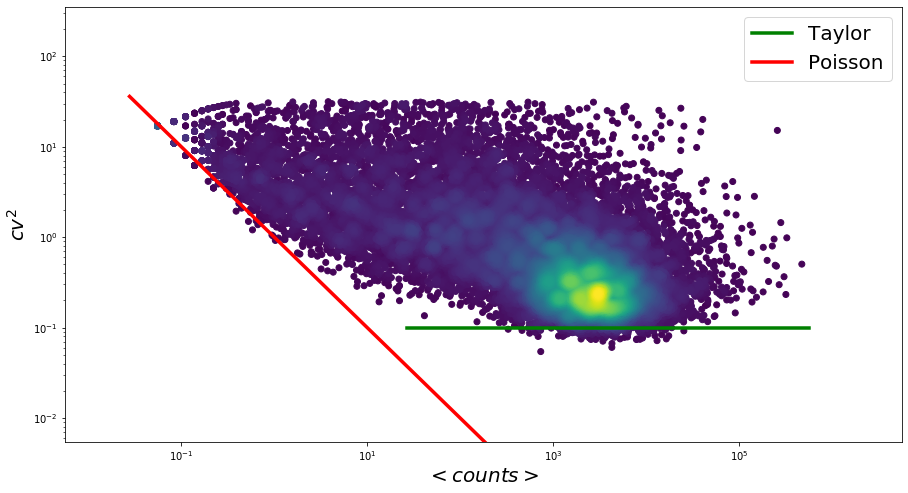

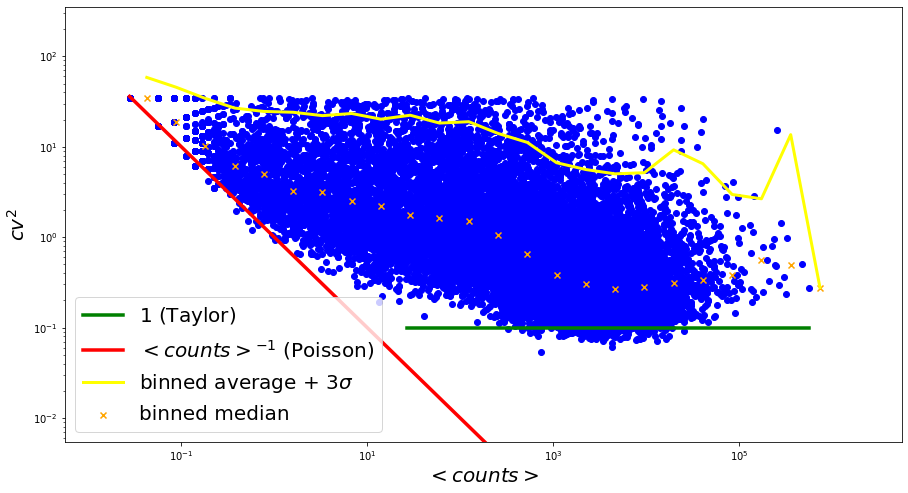

found 979 highly variable genes


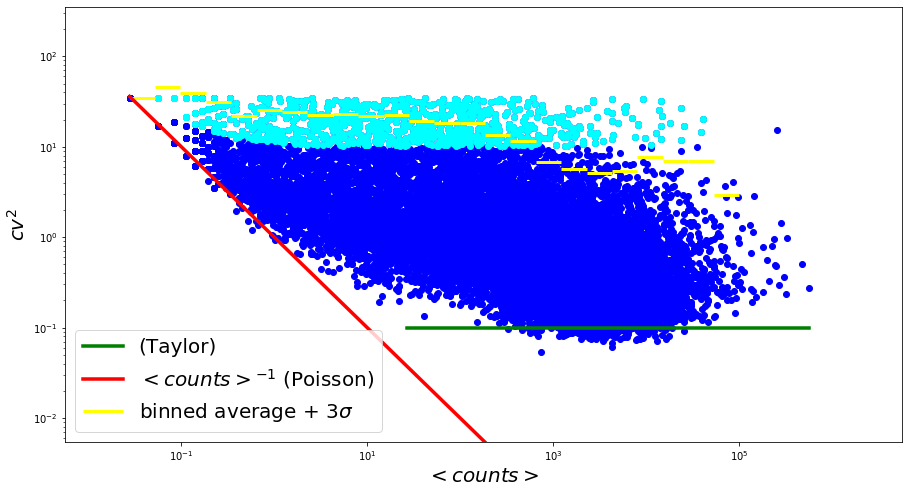

In [14]:
scalinglawsandoverexpressed(workingdir)

# Make bipartite network
```bash
python addo.py
```
```python
import tacos
tacos.makegraph()
```

In [ ]:
os.chdir(workingdir)
os.system("./data_mining 0")
os.system("./data_mining 2")
os.system("python addo.py")
os.system("./data_mining 7")

In [ ]:
os.system("scp graph.xml.gz %s/."%dockerurl)

[hSBM.ipynb]()

# Run stochastic block model
```
docker run -it -p8888:8888 -u user -v $(PWD)/drive/:/home/user/ fvalle01/hsbm bash
jupyter notebook --ip0.0.0.0 --allow-root
```

download the data

In [ ]:
os.chdir(workingdir)
os.system("mkdir -p topsbm")
os.system("scp %s/* topsbm/."%dockerurl)

# Run cluster analysis

In [ ]:
os.chdir(execdir)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
#geneontology

In [ ]:
os.chdir(execdir)
import hsbmpy, importlib
importlib.reload(hsbmpy)
from hsbmpy import clusteranalysis, get_scores, add_score_lines, getclustersizesarray
os.chdir(workingdir)

In [ ]:
labels = df_file.columns
clusteranalysis(workingdir, labels, l=5)

In [ ]:
#scores = get_scores(workingdir,labels, L=5, verbose=False)
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=[k for k in scores.keys()],xl=getclustersizesarray(workingdir,l=5))
plt.show()
fig.savefig("%s/metric.pdf"%(workingdir))

In [ ]:
geneontology.topicanalysis()

# Clean

In [ ]:
os.chdir(workingdir)
os.system("rm -rf data_mining addo.py")